# Convolutional Neural Networks
_Student 902011, Moleri Andrea, a.moleri@campus.unimib.it_

---

 Design and train a CNN with up to 7000 trainable parameters (so the maximum allowed parameters is 7k) to obtain the best results on the MNIST dataset. In other words, build a CNN trying to maximize accuracy, with 15 epochs and batch size 128. Leave the optimizer, batch size, and epochs already present in the notebook the same, changing only the configuration. Once the first CNN model is made, starting from the first model, create three more models (there should be four in total) with incremental changes and improvements, and related explanations about why layers are added or modified (the ultimate goal should be to improve the results).

---

## Inspecting the Data

In order to build a set of Convolutional Neural Networks, it is first necessary to present and inspect the dataset we will be dealing with. In particular, we will use the MNIST dataset, extremely popular for image classification tasks, consisting of handwritten digits (0 through 9) represented as grayscale images. The dimensionality and distribution of the data are analyzed in the following code cell. The training set contains `60,000` samples, each represented as a `28x28` pixel image, which corresponds to the shape `(60000, 28, 28)` for `x_train`. The labels for these images are stored in `y_train`, which has a shape of `(60000,)`. Similarly, the test set contains `10,000 samples`, with corresponding dimensions `(10000, 28, 28)` for `x_test` and `(10000,)` for `y_test`.

The pixel intensity values range between `0` (black) and `255` (white), as indicated by the output of the following code cell. The average pixel intensity in the training set is `33.32`, with a standard deviation of `78.57`. This suggests that most pixels are closer to black, with a significant variation in brightness across images. The visualization of a single sample (label `5`) demonstrates the typical appearance of a digit in the dataset, rendered in grayscale. The distribution of labels in the training set is shown in the bar chart. Each label is evenly represented, with approximately `6000` samples per digit. This uniformity ensures that the dataset is well-suited for training machine learning models without bias toward any specific class. Lastly, the example images for each label can be useful to further understand the dataset’s content. These samples highlight variations in handwriting style, stroke thickness, and overall shape.

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


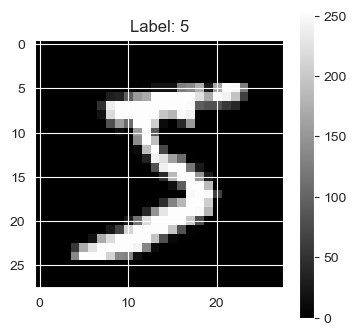

Descriptive statistics of x_train:
  Maximum value: 255
  Minimum value: 0
  Mean: 33.32
  Standard deviation: 78.57


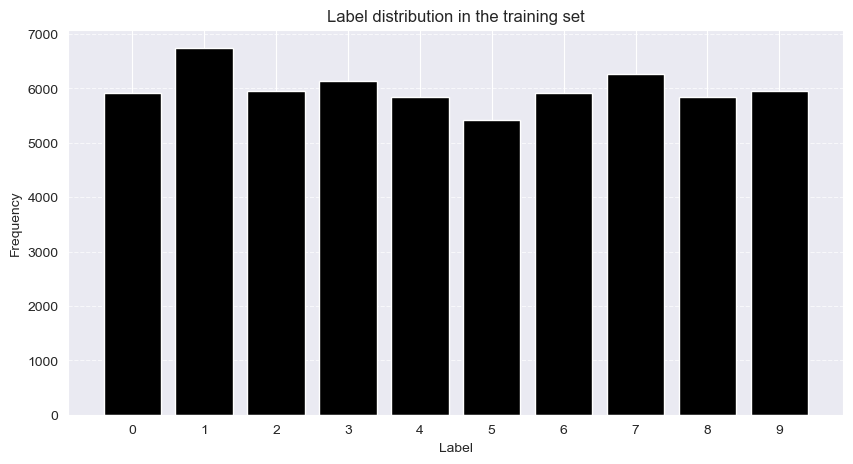

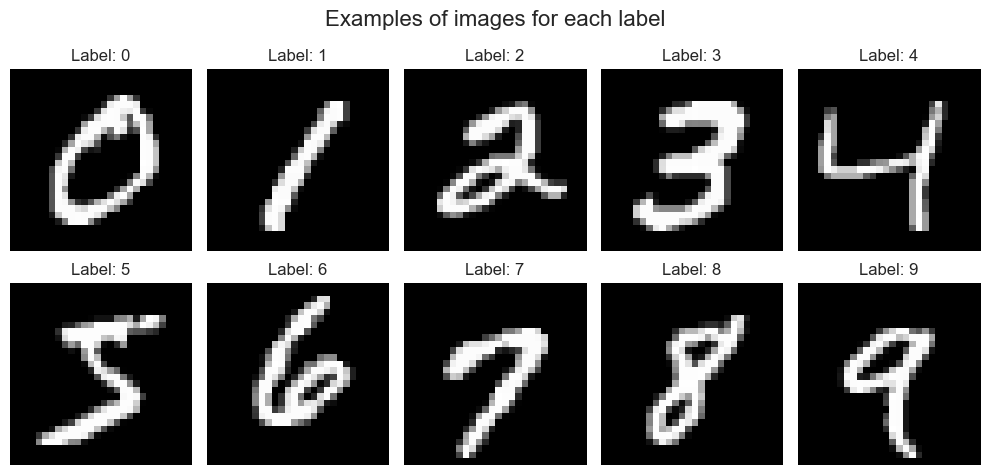

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset, consisting of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes of the training and testing datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Visualize the first image in the training set
plt.figure(figsize=(4, 4))
plt.imshow(x_train[0], cmap='gray')  # Display the image in grayscale
plt.title(f"Label: {y_train[0]}")    # Show the corresponding label as the title
plt.colorbar()                       # Add a colorbar for intensity reference
plt.show()

# Display descriptive statistics for the training dataset
print("Descriptive statistics of x_train:")
print(f"  Maximum value: {np.max(x_train)}")           # Maximum pixel intensity
print(f"  Minimum value: {np.min(x_train)}")           # Minimum pixel intensity
print(f"  Mean: {np.mean(x_train):.2f}")               # Mean pixel intensity
print(f"  Standard deviation: {np.std(x_train):.2f}")  # Standard deviation of pixel intensities

# Compute the distribution of labels in the training set
unique, counts = np.unique(y_train, return_counts=True)

# Plot the frequency distribution of labels
plt.figure(figsize=(10, 5))
plt.bar(unique, counts, color='black')               # Bar chart of label frequencies
plt.title("Label distribution in the training set")  # Title of the plot
plt.xlabel("Label")                                  # Label for the x-axis
plt.ylabel("Frequency")                              # Label for the y-axis
plt.xticks(unique)                                   # Ensure all labels are displayed on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)        # Add gridlines to the y-axis
plt.show()

# Visualize examples of images for each label (0 through 9)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))                 # Create a 2x5 grid of subplots
fig.suptitle("Examples of images for each label", fontsize=16)  # Overall title
for i in range(10):                                             # Loop through labels 0 to 9
    idx = np.where(y_train == i)[0][0]                          # Find the first index for each label
    ax = axes[i // 5, i % 5]                                    # Determine subplot position
    ax.imshow(x_train[idx], cmap='gray')                        # Display the corresponding image
    ax.set_title(f"Label: {i}")                                 # Title showing the label
    ax.axis('off')                                              # Hide axis ticks and labels
plt.tight_layout()                                              # Adjust layout to avoid overlaps
plt.show()

### Preparing the Data

In this second code cell, a series of transformations to prepare the MNIST dataset for deep learning models (particularly convolutional neural networks) is applied. These steps help improve model performance and ensure compatibility with the neural network's architecture. First, we **normalize** the pixel values. The raw pixel values in the dataset range from `0` to `255`, so we scale them to the range `[0, 1]` by dividing by `255`. This reduces computational load and standardizes the input. After normalization, the pixel values are represented as floating-point numbers between `0.0` and `1.0`. Despite this transformation, the visual appearance of the images remains the same. Next, we **reshape** the images to match CNN requirements. The original images have the shape `(28, 28)`, but for CNNs, we add a **channel dimension** to indicate that the images are grayscale. Using `np.expand_dims`, we change the shape of both the training and testing datasets to `(60000, 28, 28, 1)` and `(10000, 28, 28, 1)`, respectively. This adjustment makes the data compatible with convolutional layers, which expect a **4-Dimensional** input _(samples, height, width, channels)_.

The next step is to apply **label encoding**, converting the labels from integer values (e.g., `0`, `1`, `2`, `3`, ...) into **one-hot encoded** vectors. Each label is transformed into a binary vector of length `10`, where the position corresponding to the true label is set to `1`, and the rest are set to `0`. For example, the label `5` becomes `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`. One-hot encoding is very important for multi-class classification tasks, enabling the model to output a probability distribution over the `10` possible classes. Finally, we visualize the results of preprocessing. A subplot shows the **normalized image** alongside its **pixel value distribution**. While the image itself appears unchanged, its pixel values now range from `0.0` to `1.0`. The pixel value histogram shows a prominent peak at `0.0`, representing black pixels, and a much smaller peak near `1.0`, representing areas in which the digits are actually written. The remaining pixel values represent varying shades of gray but occur less frequently, emphasizing that most of the image consists of either very dark or bright pixels.

New x_train shape: (60000, 28, 28, 1), x_test shape: (10000, 28, 28, 1)
One-hot encoded label of the first training example (label 5): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Example of normalization:


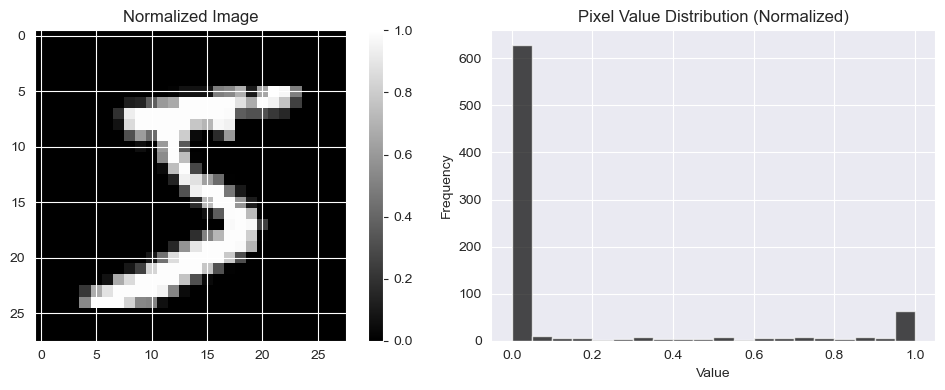

In [96]:
from tensorflow import keras

# Set a fixed random seed for reproducibility
keras.utils.set_random_seed(42)

# Normalize the pixel values to the range [0, 1] by dividing by 255
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Expand dimensions of the images to match the expected input shape for CNNs (adding a channel dimension)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Print the new shapes of the training and testing datasets after reshaping
print(f"New x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")

# Convert the labels into one-hot encoded vectors for multi-class classification
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Print the one-hot encoded label of the first training example
print(f"One-hot encoded label of the first training example (label 5): {y_train[0]}")

# Example of normalization: visualizing the normalized image and its pixel value distribution
print("\nExample of normalization:")
plt.figure(figsize=(10, 4))

# Subplot 1: Display the first image in the training set after normalization
plt.subplot(1, 2, 1)
plt.imshow(x_train[0].squeeze(), cmap='gray')  # Use squeeze to remove the channel dimension for visualization
plt.title("Normalized Image")                  # Title for the image
plt.colorbar()                                 # Add a colorbar to show intensity values

# Subplot 2: Display a histogram of the pixel values for the normalized image
plt.subplot(1, 2, 2)
plt.hist(x_train[0].flatten(), bins=20, color='black', alpha=0.7)  # Flatten the image for histogram
plt.title("Pixel Value Distribution (Normalized)")                 # Title for the histogram
plt.xlabel("Value")                                                # Label for the x-axis
plt.ylabel("Frequency")                                            # Label for the y-axis

# Adjust layout to ensure proper spacing between the subplots
plt.tight_layout()
plt.show()

## Building the Network
 Design and train a CNN with up to 7000 trainable parameters (so the maximum allowed parameters is 7k) to obtain the best results on the MNIST dataset. In other words, build a CNN trying to maximize accuracy, with 15 epochs and batch size 128. Leave the optimizer, batch size, and epochs already present in the notebook the same, changing only the configuration. Once the first CNN model is made, starting from the first model, create three more models (there should be four in total) with incremental changes and improvements, and related explanations about why layers are added or modified (the ultimate goal should be to improve the results). None of the 4 networks must exceed 7000 trainable parameters. This is a mandatory limit to respect.

In [90]:
from tensorflow.keras import layers

input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #default stride = 1
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        #default pool_size selected
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # adesso voglio distruggere la dimensionalità e usare una FNN
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Keras trasforma 1600 to 10 in automatico, in molti casi invece è da fare per conto nostro
model.summary()

# Param terza riga 3x3xdepth channel 32, 64 da aggiungere che sono i bayas da aggiungere
# 5 riga abbiamo 1600 valori perchè è stato trasformato i valori dei 64 filtri in un array singolo
# ultima riga 1600*10 di prima più i 10 bayes
# None va a rappresentare il batch size

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_133 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_130 (MaxPool  (None, 13, 13, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_134 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_131 (MaxPool  (None, 5, 5, 64)          0         
 ing2D)                                                          
                                                                 
 flatten_64 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_61 (Dropout)        (None, 1600)            

In [97]:
from tensorflow.keras import layers, models

input_shape = (28, 28, 1)

# ------------------- MODELLO 1: Versione super semplificata -------------------
model_1 = models.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),  # 4 filtri
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),  # 10 neuroni in output
])

model_1.summary()

# ------------------- MODELLO 2: Architettura con ancora meno filtri -------------------
model_2 = models.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),  # Ancora meno filtri
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),  # 8 filtri
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),  # Solo 10 neuroni
])

model_2.summary()

# ------------------- MODELLO 3: Un altro modello con pochi parametri -------------------
model_3 = models.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),  # 8 filtri
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),  # Ridotto a 8 filtri
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),  # Solo 10 neuroni
])

model_3.summary()

# ------------------- MODELLO 4: Modello ultra semplificato -------------------
model_4 = models.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),  # Ridotto a 8 filtri
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),  # Ridotto a 16 filtri
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),  # Solo 10 neuroni in output
])

model_4.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_142 (Conv2D)         (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_139 (MaxPool  (None, 13, 13, 4)         0         
 ing2D)                                                          
                                                                 
 flatten_69 (Flatten)        (None, 676)               0         
                                                                 
 dropout_66 (Dropout)        (None, 676)               0         
                                                                 
 dense_73 (Dense)            (None, 10)                6770      
                                                                 
Total params: 6810 (26.60 KB)
Trainable params: 6810 (26.60 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

Epoch 1/15
375/375 [==============================] - 5s 13ms/step - loss: 0.8368 - accuracy: 0.7557 - val_loss: 0.3137 - val_accuracy: 0.9171
Epoch 2/15
375/375 [==============================] - 5s 13ms/step - loss: 0.4003 - accuracy: 0.8794 - val_loss: 0.2458 - val_accuracy: 0.9337
Epoch 3/15
375/375 [==============================] - 5s 15ms/step - loss: 0.3404 - accuracy: 0.8971 - val_loss: 0.2094 - val_accuracy: 0.9448
Epoch 4/15
375/375 [==============================] - 5s 13ms/step - loss: 0.3057 - accuracy: 0.9073 - val_loss: 0.1865 - val_accuracy: 0.9502
Epoch 5/15
375/375 [==============================] - 5s 13ms/step - loss: 0.2849 - accuracy: 0.9137 - val_loss: 0.1699 - val_accuracy: 0.9557
Epoch 6/15
375/375 [==============================] - 5s 14ms/step - loss: 0.2668 - accuracy: 0.9191 - val_loss: 0.1589 - val_accuracy: 0.9582
Epoch 7/15
375/375 [==============================] - 6s 15ms/step - loss: 0.2570 - accuracy: 0.9218 - val_loss: 0.1510 - val_accuracy: 0.9602

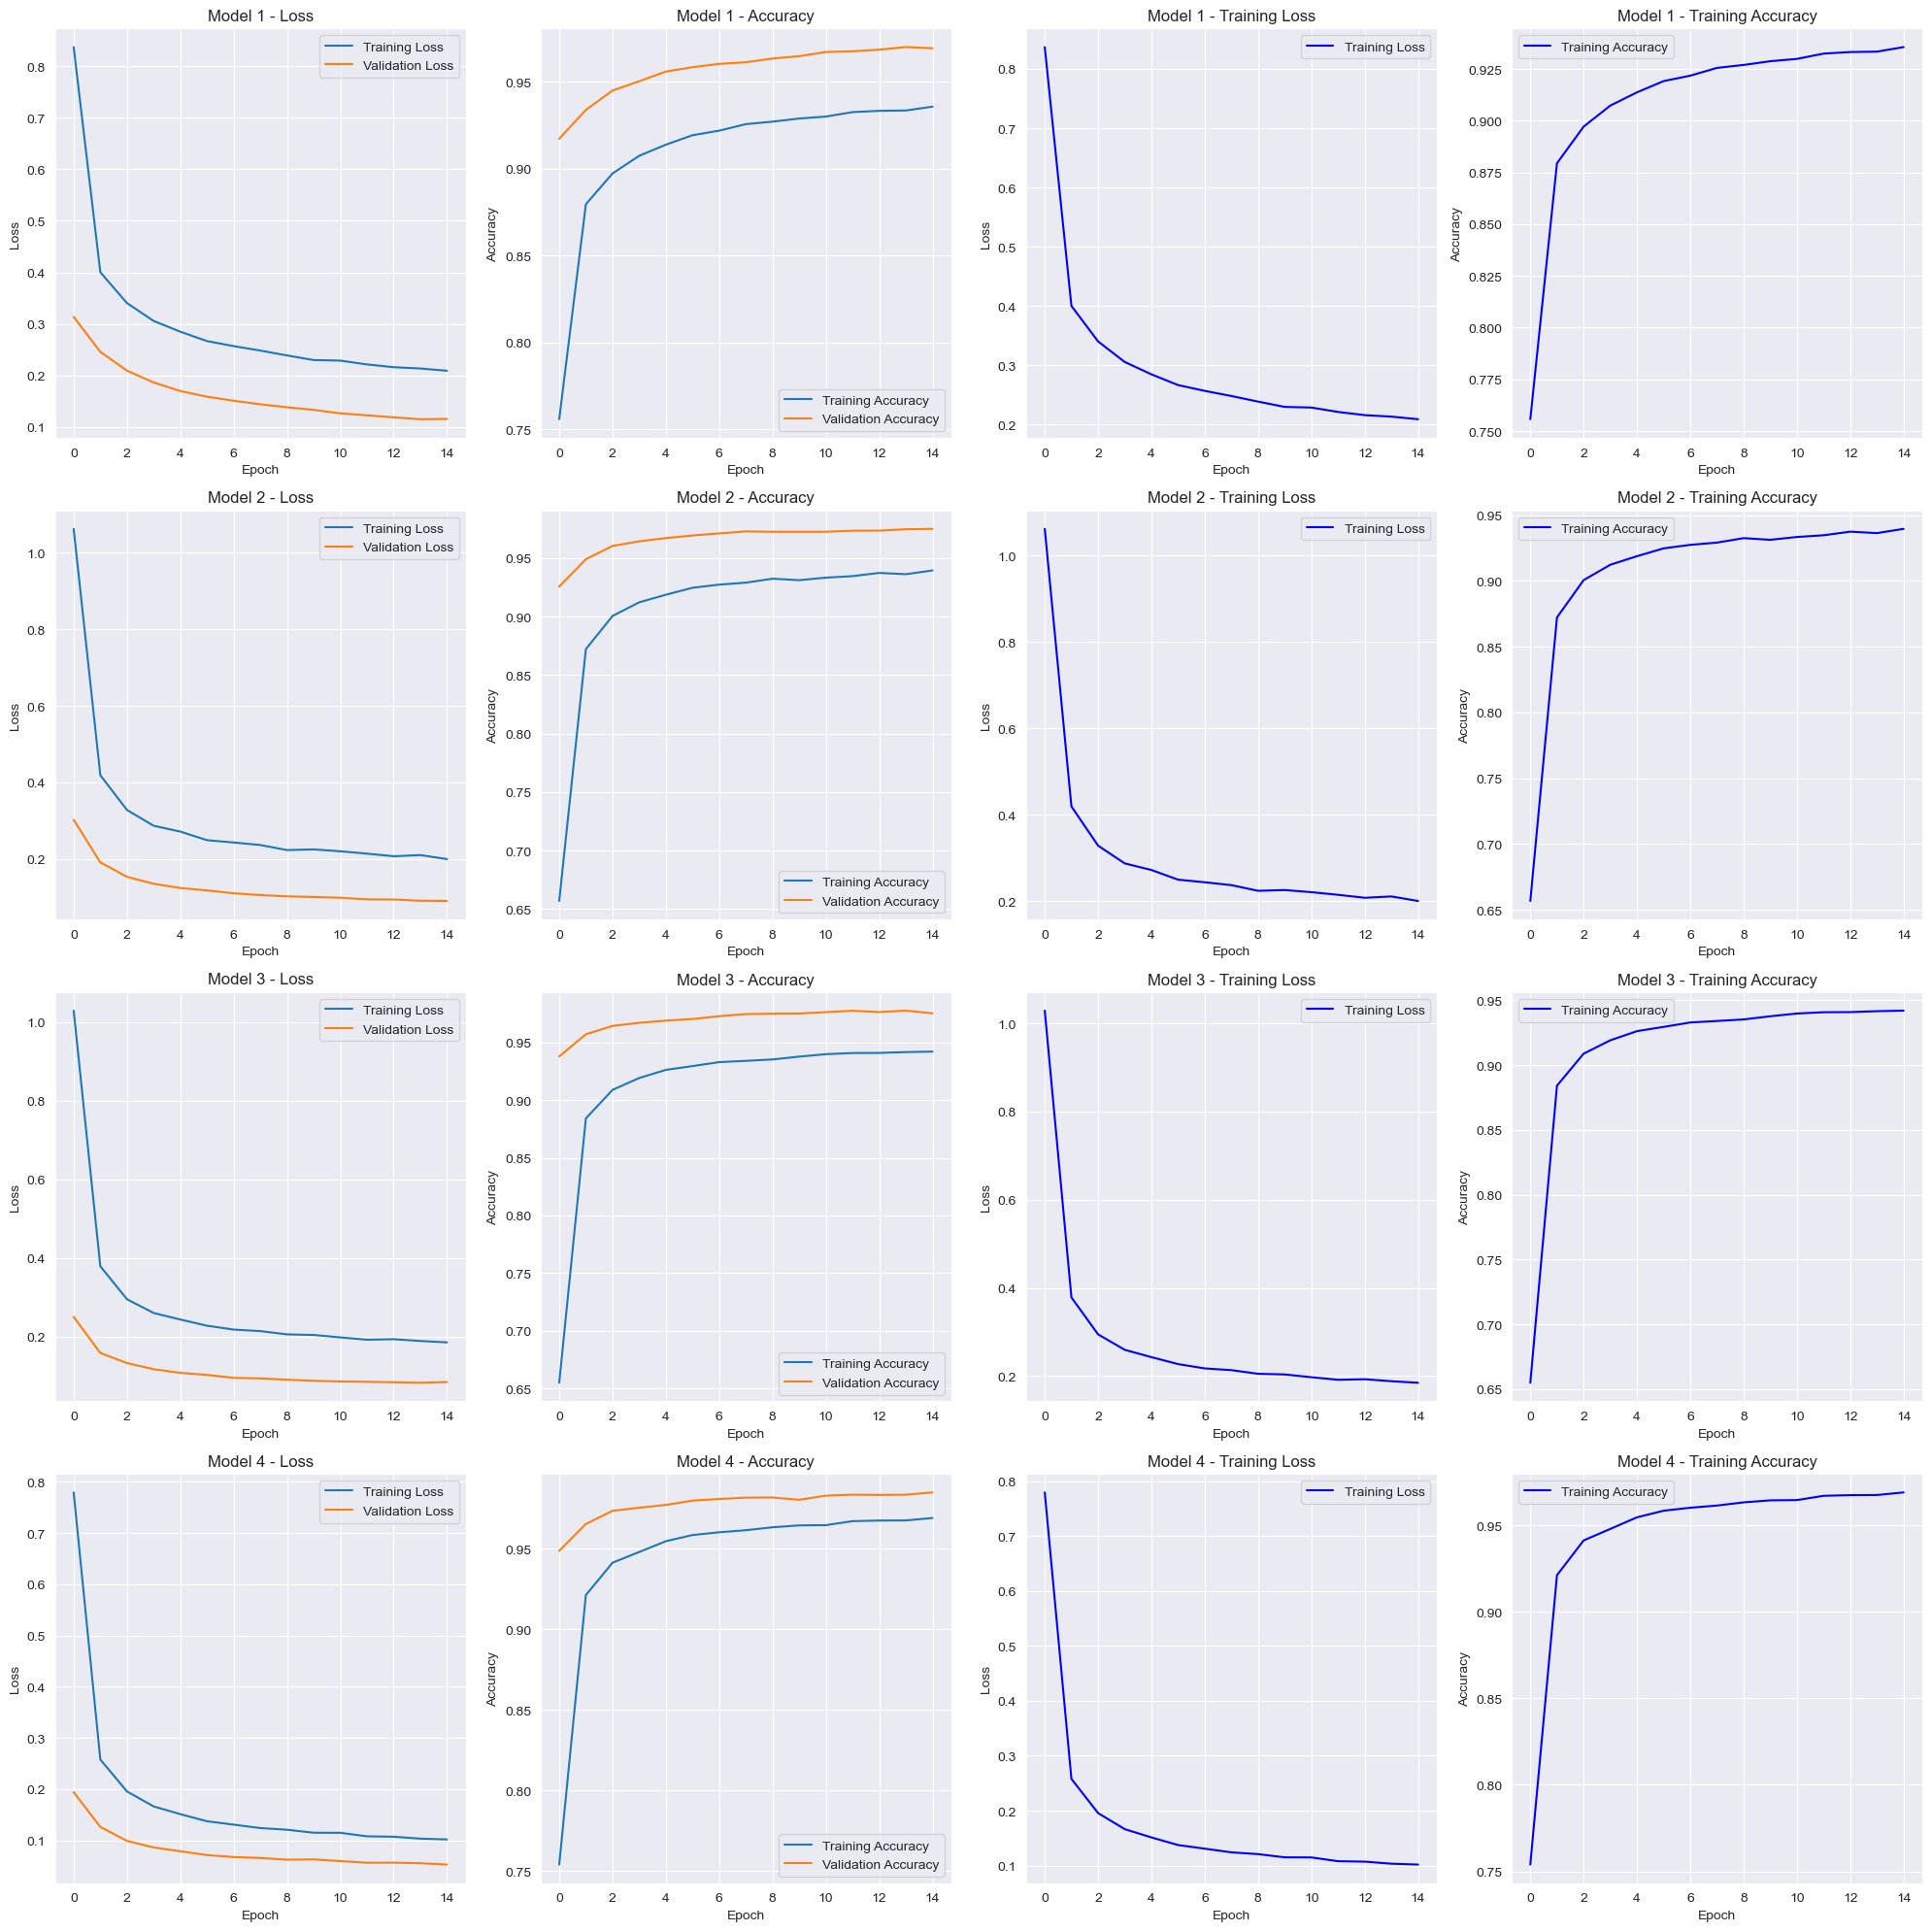

Test Results:

Model 1 - Test Loss: 0.1105, Test Accuracy: 0.9684
Model 2 - Test Loss: 0.0872, Test Accuracy: 0.9739
Model 3 - Test Loss: 0.0770, Test Accuracy: 0.9771
Model 4 - Test Loss: 0.0438, Test Accuracy: 0.9856


In [98]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset, which contains handwritten digits and their corresponding labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the training and testing data to match the input shape expected by the model.
# The data is also normalized by scaling the pixel values to the range [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert the labels to one-hot encoded vectors, since this is a classification problem with 10 classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the batch size and the number of epochs for training
batch_size = 128
epochs = 15

# Function to plot the performance of the models during training
# This function creates plots for the loss and accuracy of both training and validation datasets
def plot_performance(history, ax, model_name, show_full=True):
    # Extract the training and validation metrics from the history object
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    # If the full performance plots are required, display both training and validation loss/accuracy
    if show_full:
        ax[0].plot(train_loss, label='Training Loss')
        ax[0].plot(val_loss, label='Validation Loss')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[0].set_title(f'{model_name} - Loss')
        ax[0].legend()
        
        ax[1].plot(train_acc, label='Training Accuracy')
        ax[1].plot(val_acc, label='Validation Accuracy')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')
        ax[1].set_title(f'{model_name} - Accuracy')
        ax[1].legend()
    else:
        # If only the training metrics are required, display only the training loss/accuracy
        ax[0].plot(train_loss, label='Training Loss', color='blue')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[0].set_title(f'{model_name} - Training Loss')
        ax[0].legend()

        ax[1].plot(train_acc, label='Training Accuracy', color='blue')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')
        ax[1].set_title(f'{model_name} - Training Accuracy')
        ax[1].legend()

# List of models to be evaluated
models = [model_1, model_2, model_3, model_4]

# Corresponding names of the models for labeling the plots
model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]

# Create a grid of subplots for displaying the performance of each model
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Lists to store the training history and test results for each model
histories = []
test_scores = []

# Loop through each model, train it, and evaluate its performance
for i, model in enumerate(models):
    # Compile the model with categorical crossentropy loss function and Adam optimizer
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    # Train the model on the training data, using 20% of the data for validation
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)

    # Plot the training and validation loss/accuracy for the current model
    plot_performance(history, axes[i, 0:2], model_names[i], show_full=True)
    plot_performance(history, axes[i, 2:4], model_names[i], show_full=False)

    # Evaluate the model's performance on the test data
    score = model.evaluate(x_test, y_test, verbose=0)
    test_scores.append((model_names[i], score[0], score[1]))

# Adjust the layout of the plots for better visualization
plt.tight_layout()
plt.show()

# Print the test results for all models, sorted by test accuracy in descending order
print("Test Results:\n")
for name, loss, acc in sorted(test_scores, key=lambda x: x[2], reverse=False):
    print(f"{name} - Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

Epoch 1/15
375/375 [==============================] - 14s 35ms/step - loss: 0.3896 - accuracy: 0.8860 - val_loss: 0.1060 - val_accuracy: 0.9696
Epoch 2/15
375/375 [==============================] - 13s 35ms/step - loss: 0.1215 - accuracy: 0.9627 - val_loss: 0.0785 - val_accuracy: 0.9771
Epoch 3/15
375/375 [==============================] - 15s 40ms/step - loss: 0.0893 - accuracy: 0.9725 - val_loss: 0.0568 - val_accuracy: 0.9840
Epoch 4/15
375/375 [==============================] - 14s 37ms/step - loss: 0.0750 - accuracy: 0.9766 - val_loss: 0.0542 - val_accuracy: 0.9851
Epoch 5/15
375/375 [==============================] - 16s 43ms/step - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.0458 - val_accuracy: 0.9861
Epoch 6/15
375/375 [==============================] - 17s 47ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 7/15
375/375 [==============================] - 17s 45ms/step - loss: 0.0564 - accuracy: 0.9829 - val_loss: 0.0403 - val_accuracy:

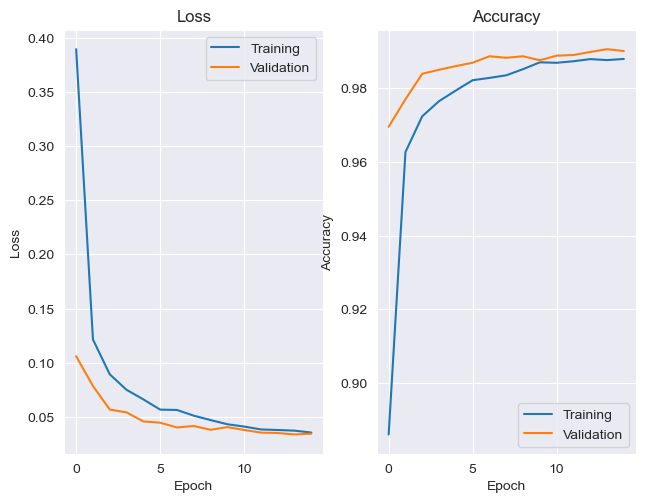

Test loss: 0.026222271844744682
Test accuracy: 0.9912999868392944


In [44]:
# Cercare di prendere best result from il cambio dei parametri prima non batch e epoch
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# history per salvarlo e poi andarlo a plottare
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

def plot_performance(history):
  fig, ax = plt.subplots(1, 2)
  # Plot training & validation accuracy values
  fig.tight_layout()
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  val_acc = history.history['val_accuracy']
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')
  ax[0].plot(train_loss, label='Training')
  ax[0].plot(val_loss, label='Validation')
  ax[0].legend()
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Accuracy')
  ax[1].plot(train_acc, label='Training')
  ax[1].plot(val_acc, label='Validation')
  ax[1].legend()
  plt.show()

plot_performance(history)
# learning rate potrebbe essere buono ma un po' grosso che fa a zig zag
# secondo plot per capire se siamo in overfitting o no

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# minor numero di parametri: max_pooling con size 28,28 to 1x1 e poi lo mettiamo nel fully connected layer e che si
# collegeranno a 10 classi, 10 pesi e e 10 bias

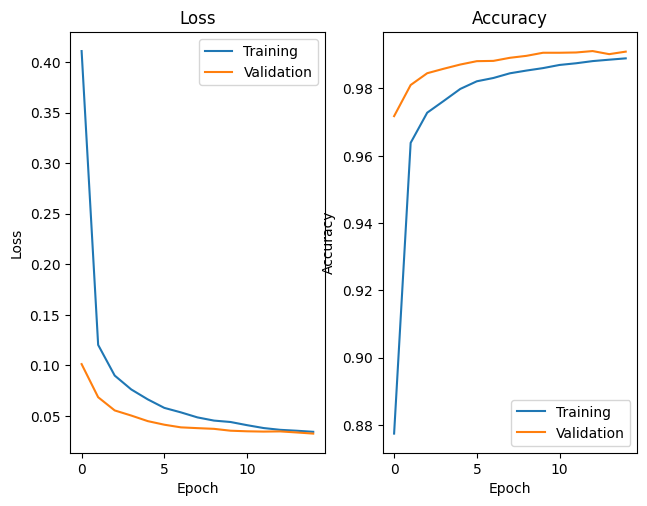

Test loss: 0.02589333802461624
Test accuracy: 0.9911999702453613


In [24]:
model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        # quanto è bright il pixel, averagePooling da l'informazione su quanto ink c'è in quel drawing
        # esempio 8 ha più ink mentre il resto ne avrà meno.
        # Cos'è che la NN può captare da questa nuova informazione? E' questo che devi pensare, per la NN.
        layers.MaxPooling2D(pool_size=(28, 28)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_smallest.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_smallest.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history_smallest = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0964 - loss: 2.3498 - val_accuracy: 0.0989 - val_loss: 2.3052
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1090 - loss: 2.3033 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3009 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.

In [26]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# spara a caso 10% , in questo caso comunque è un pochetto migliore

Test loss: 2.3011972904205322
Test accuracy: 0.11349999904632568


Below 7000 parameters tale per cui sia uno dei migliori. Lavora con i layer , così da capire i smallest parameters tale per cui sia buono. Task